In [106]:
%store -r subset
# subset['rtt'].to_numpy()

array([ 18.381,  13.195,  15.262,  12.382,  13.951,  11.415,  14.457,
        13.552,  11.758,  24.324,  25.129,  10.906,  10.706,  11.042,
        13.225,  11.159,  12.923,  22.923,  14.556,  12.866,  17.456,
        18.506,  24.122,  12.983,  16.056,  32.107,  25.903,  10.626,
        16.352,  11.199,  14.081,  18.231,  18.108,  16.621,  11.018,
        12.662,  11.058,  11.553,  17.323,  11.929,  11.112,  10.792,
        10.858,  14.645,  53.15 ,  11.437,  14.223,  19.591,  13.973,
        13.267,  15.798,  35.397,  16.289,  26.812,  14.816,  13.492,
        13.901,  16.234,  13.412,  17.118,  12.991,  11.376,  14.404,
        17.915,  13.488,  12.82 ,  18.536,  10.937,  11.39 ,  12.036,
        20.268,  22.959,  17.347,  11.07 ,  11.468,  15.399,  15.952,
        14.968,  20.006,  15.584,  11.4  ,  32.022,  15.236,  15.241,
        11.661,  11.259,  11.243,  15.992,  19.674,  32.617,  11.91 ,
        21.386,  10.442,  12.944,  17.887,  31.174,  12.408,  12.427,
        14.625,  21.

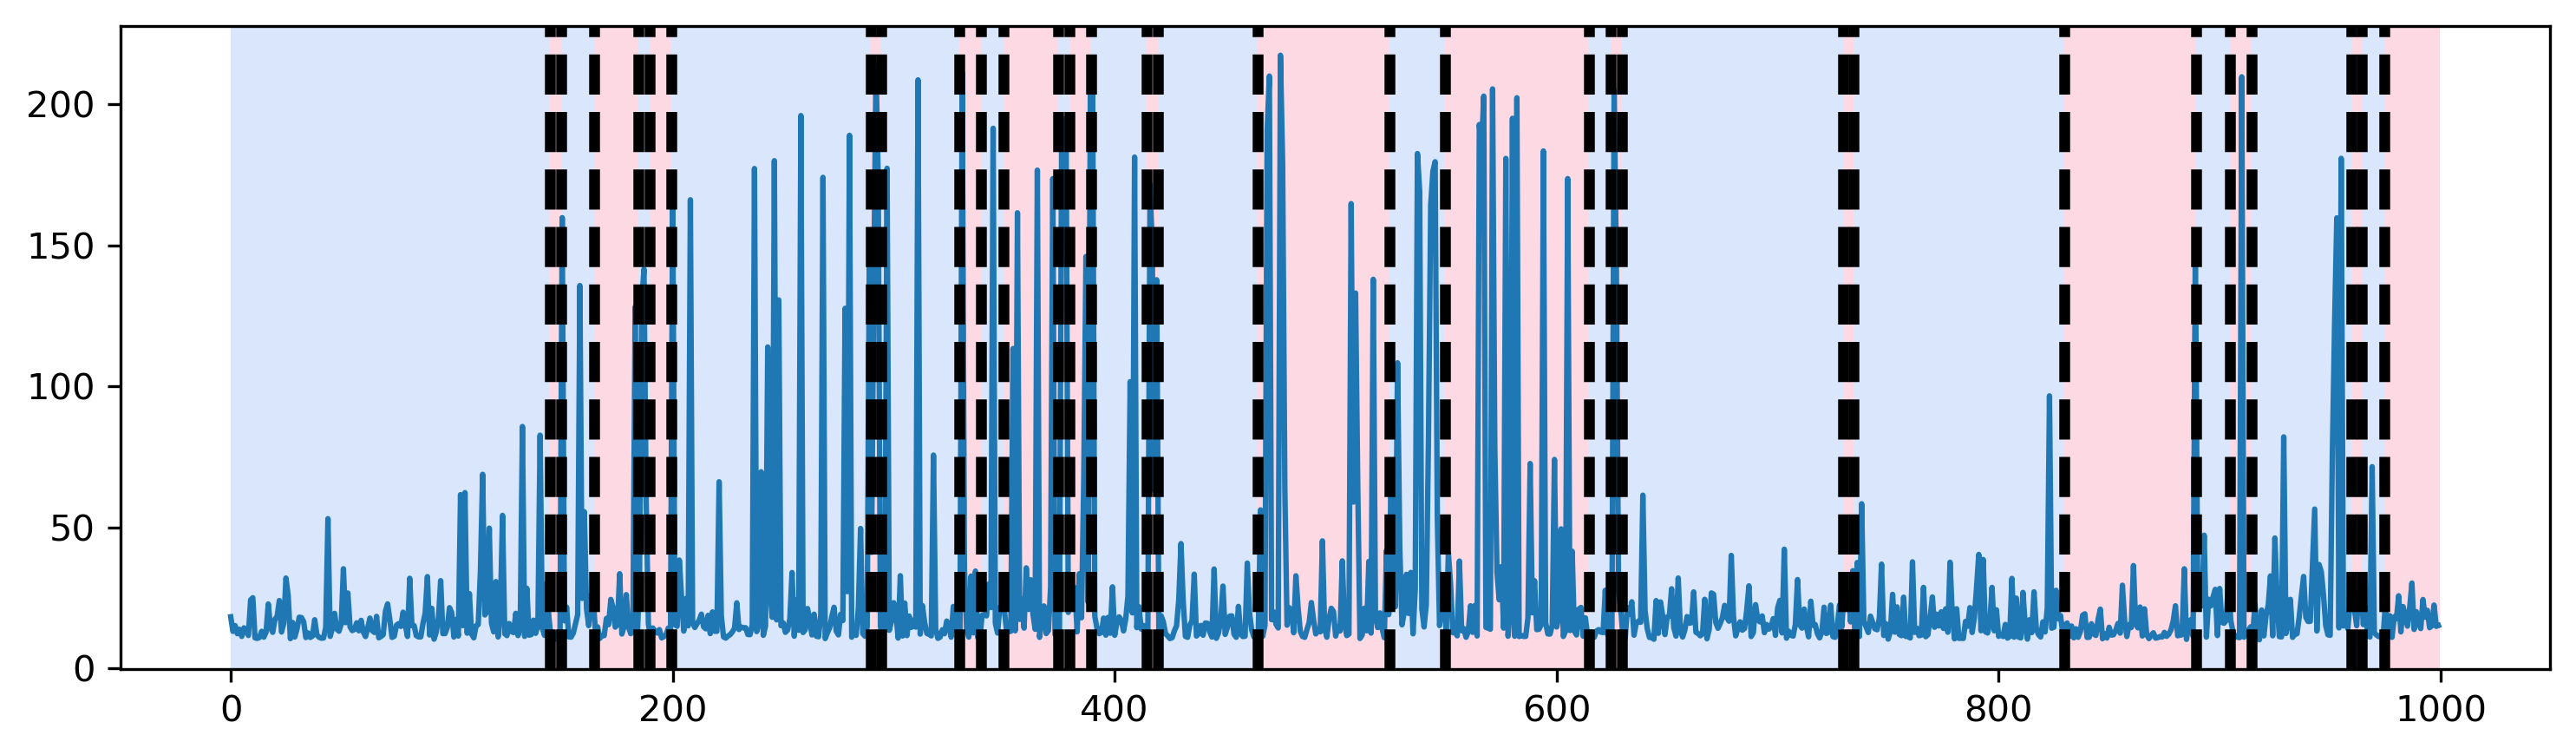

In [118]:
signal = subset['rtt'].to_numpy()

algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=1) # default 10




# display

fig, (ax, ) = rpt.display(signal, result, result, figsize=(10, 3), linewidth=0.1)

plt.show()


In [110]:
result

[1000]

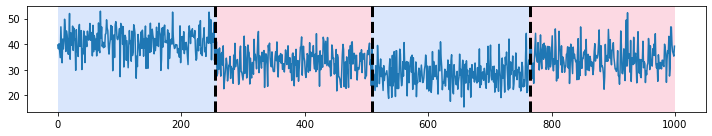

In [2]:
# req. ruptures-1.1.5
# see https://github.com/deepcharles/ruptures
import matplotlib.pyplot as plt
import numpy as np
import ruptures as rpt

# generate signal
n_samples, dim, sigma = 1000, 1, 5
n_bkps = 3  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)

signal = signal + 50


# Pelt detection
# algo = rpt.Pelt(model="rbf").fit(signal)
# result = algo.predict(pen=10) # default 10

model = "l2"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(signal)
my_bkps = algo.predict(n_bkps=n_bkps)


# display
rpt.display(signal, bkps, my_bkps)


plt.savefig("MTL/Figures/changepoints/demo.pdf", dpi=300, 
                  facecolor='w',                                                
                  edgecolor='w',
                  orientation='portrait', 
                  papertype=None,                                  
                  format=None,                                
                  transparent=False,     
                  bbox_inches=None,                
                  pad_inches=0.1
                  )

plt.show()



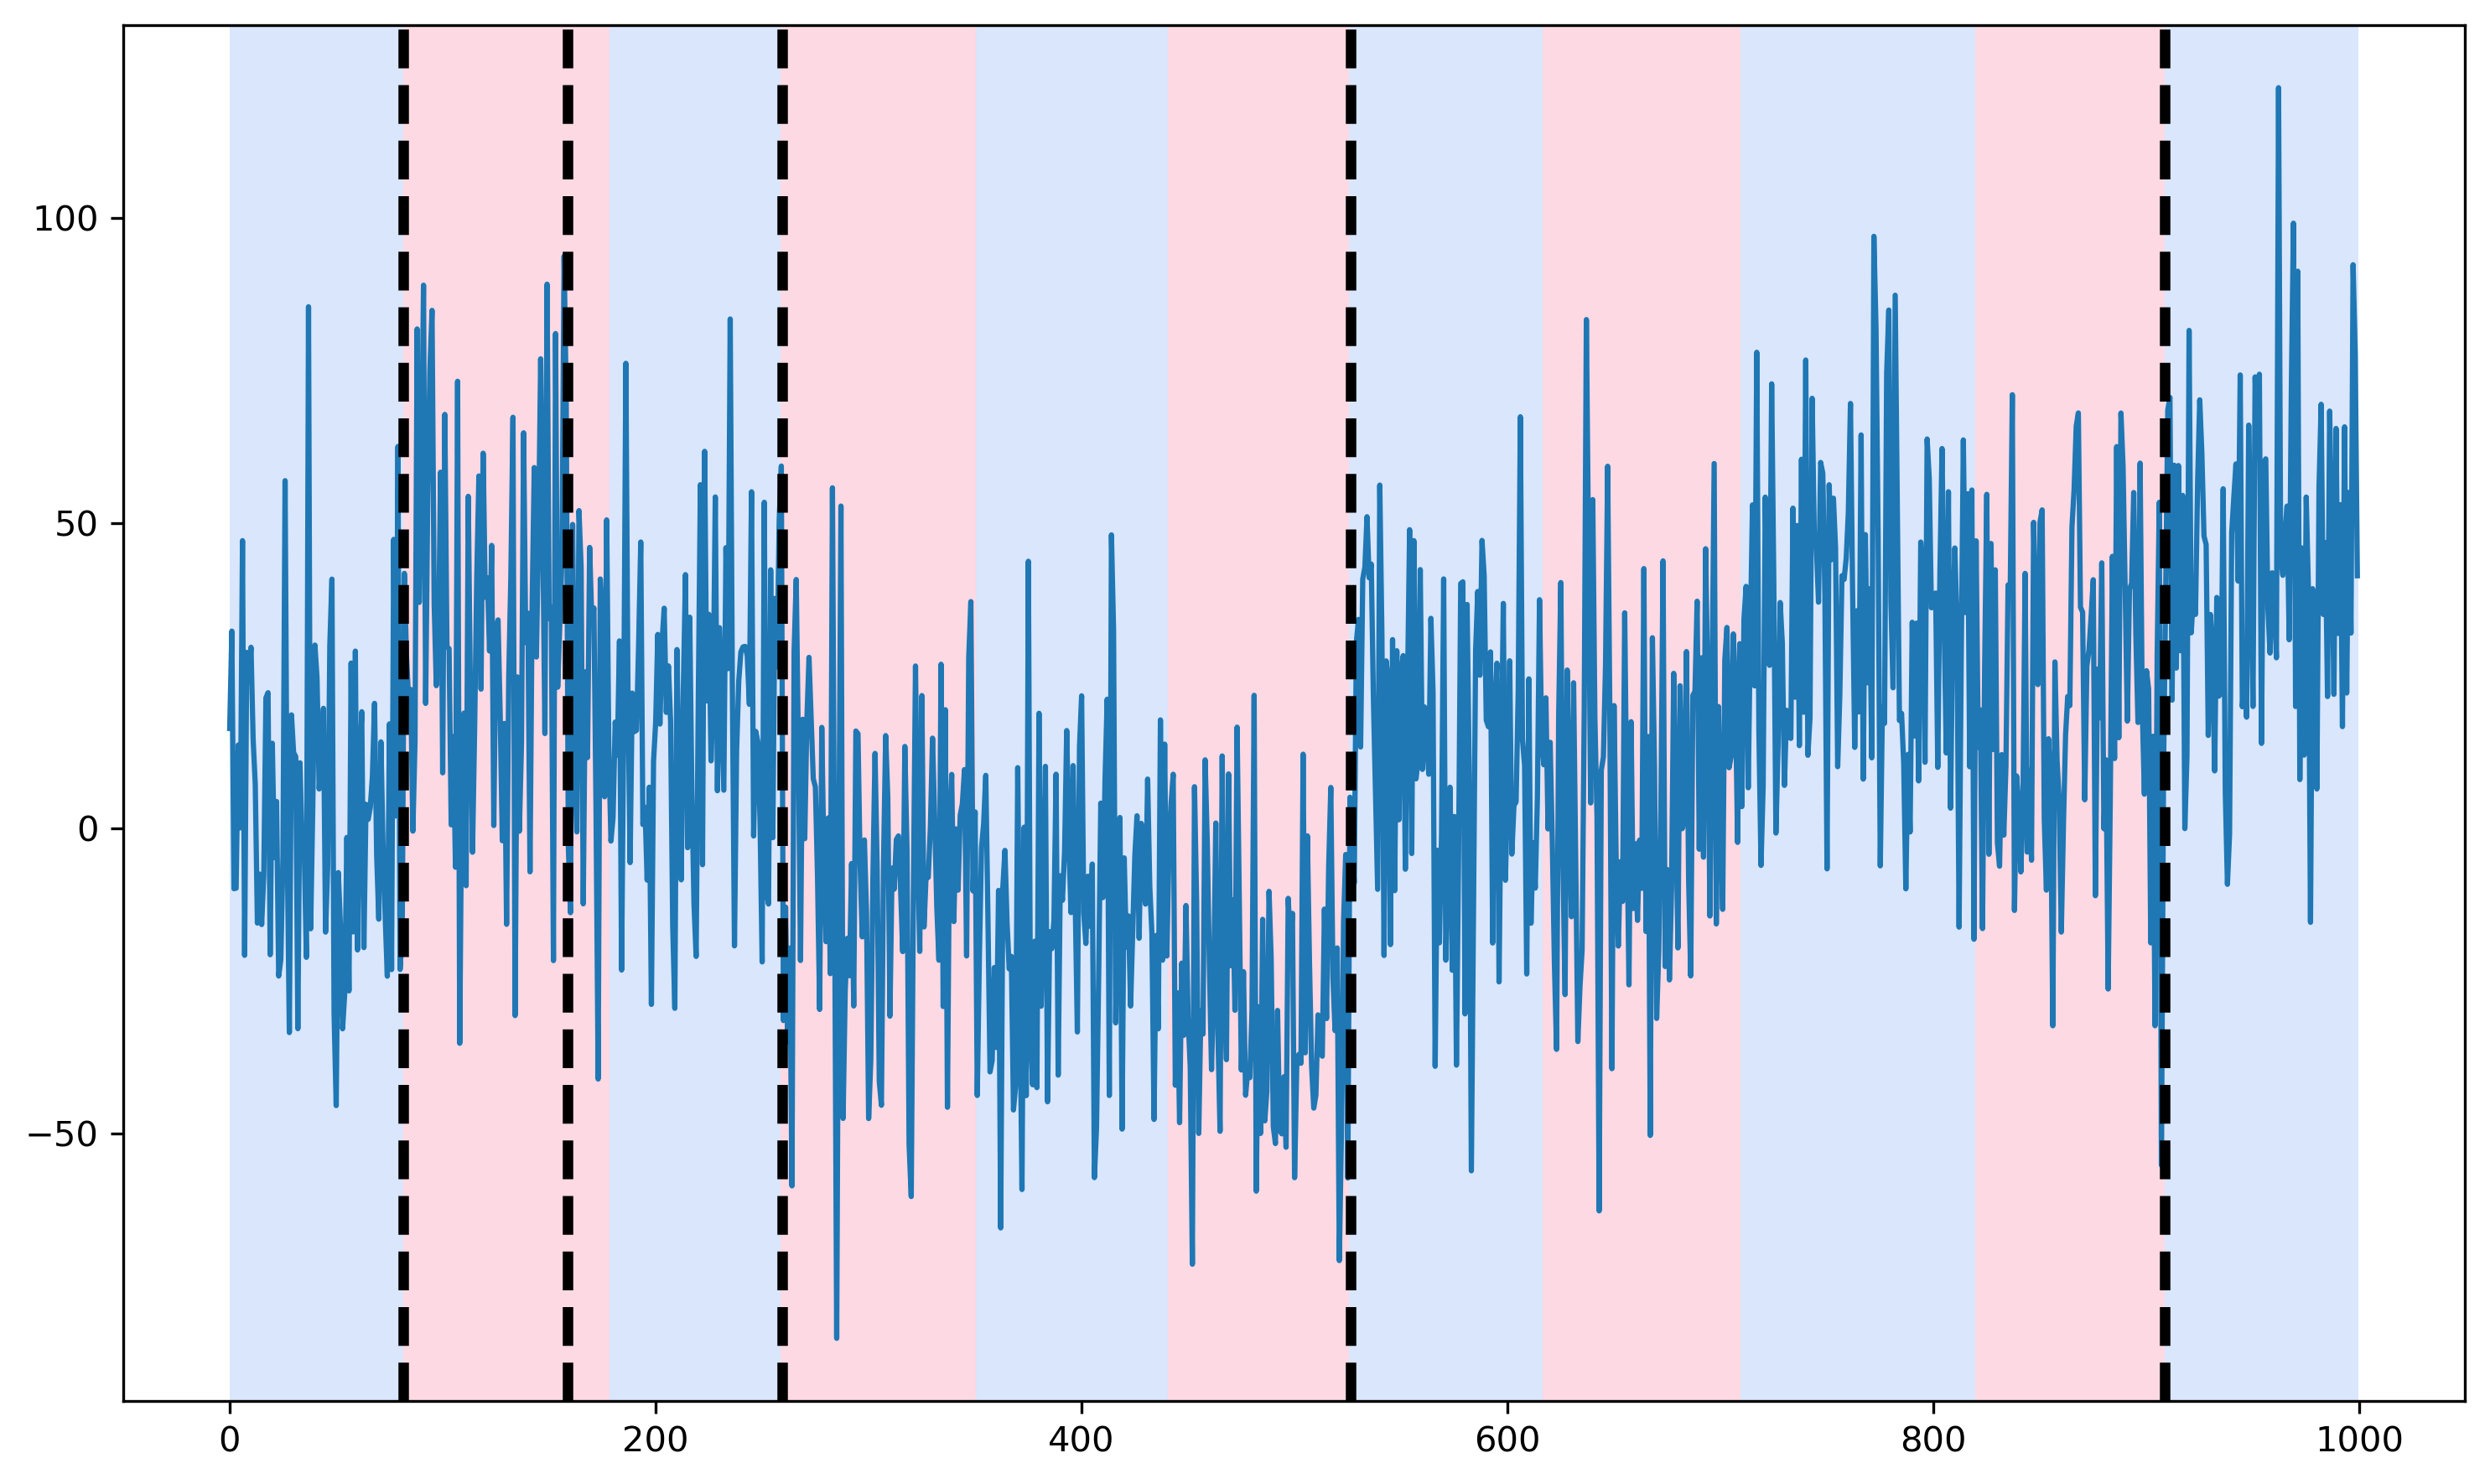

In [99]:
# Window sliding segmentation

# creation of data
n, dim = 1000, 1  # number of samples, dimension
n_bkps, sigma = 10, 5  # number of change points, noise standart deviation

signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)
# signal, bkps = rpt.pw_normal(n, n_bkps)

signal = signal * 5 + 50

# print(signal, bkps)

# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
# model = "linear"
algo = rpt.Window(width=40, model=model, jump=1).fit(signal)


#### if num breakpoints is known:
# my_bkps = algo.predict(n_bkps=10)

#### if num. changepoints is unknown:
my_bkps = algo.predict(pen=np.log(n) * dim * sigma ** 2) # specify penalty function
#### or
# my_bkps = algo.predict(epsilon=3 * n * sigma ** 2) # specify threshold on residual norm


# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))

plt.savefig("MTL/Figures/changepoints/window.pdf", dpi=300, 
                  facecolor='w',                                                
                  edgecolor='w',
                  orientation='portrait', 
                  papertype=None,                                  
                  format=None,                                
                  transparent=False,     
                  bbox_inches=None,                
                  pad_inches=0.1
                  )

plt.show()